In [3]:
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(tidyverse)
library(dplyr)

## Downloading and Reading

In [9]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
destfile <- "auto-mpg.data"
download.file(url, destfile)


cars <- read.table("auto-mpg.data")%>%
        rename(mpg = V1,
          cylinders = V2,
          dispacement = V3,
          horsepower = V4,
          weight = V5,
          acceleration = V6,
          model = V7,
          origin = V8,
          name = V9) %>%
        mutate(horsepower = as.numeric(horsepower),
               cylinders = as.factor(cylinders))%>%
        filter(!is.na(mpg),
               !is.na(horsepower),
               !is.na(acceleration),
               cylinders %in% c(8,6,4)) %>%
        select(mpg, cylinders, horsepower, acceleration)
head(cars)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


,mpg,cylinders,horsepower,acceleration
,<dbl>,<fct>,<dbl>,<dbl>
1,18,8,130,12.0
2,15,8,165,11.5
3,18,8,150,11.0
4,16,8,150,12.0
5,17,8,140,10.5
6,15,8,198,10.0


## MPG

cylinders,sample_size,mean,sd,minimum,lower_quartile,median,upper_quartile,max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,199,29.28392,5.670546,18,25,28.4,32.95,46.6
6,83,19.97349,3.828809,15,18,19.0,21.00,38.0
8,103,14.96311,2.836284,9,13,14.0,16.00,26.6


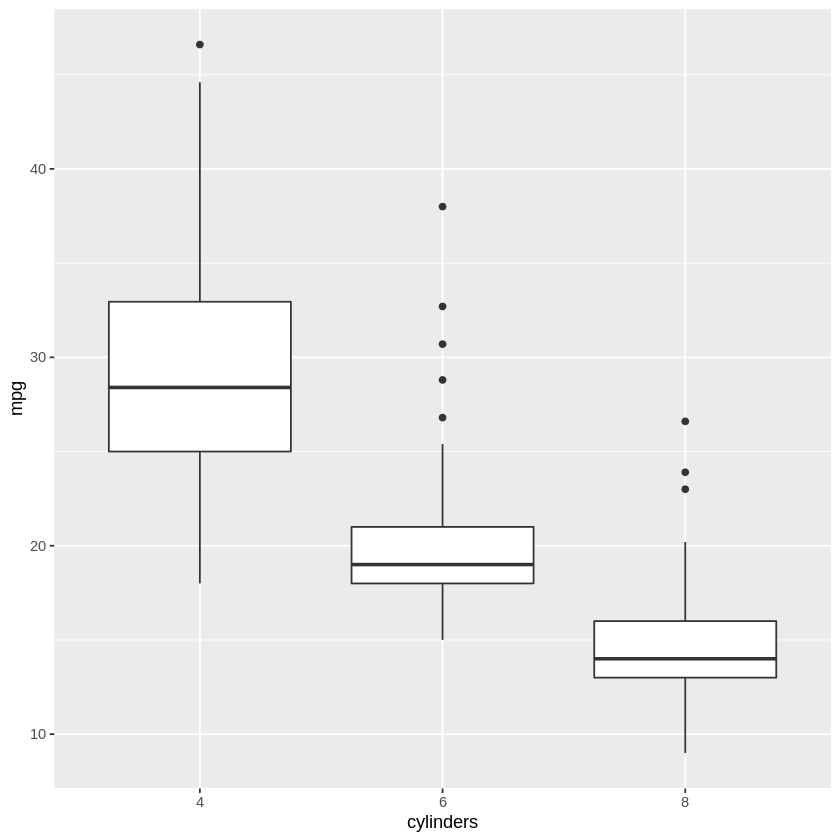

In [10]:
cars_summ_mpg <- cars %>% group_by(cylinders) %>%
  summarize(sample_size = n(),
    mean = mean(mpg),
    sd = sd(mpg),
    minimum = min(mpg),
    lower_quartile = quantile(mpg, 0.25),
    median = median(mpg),
    upper_quartile = quantile(mpg, 0.75),
    max = max(mpg))
cars_summ_mpg

cars_plot_1 <- cars %>%
    ggplot(aes(x= cylinders, y = mpg)) +
    geom_boxplot()
cars_plot_1 

## Horsepower

cylinders,sample_size,mean,sd,minimum,lower_quartile,median,upper_quartile,max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,199,78.28141,14.52310,46,68.0,78,88,115
6,83,101.50602,14.31047,72,92.5,100,110,165
8,103,158.30097,28.45355,90,140.0,150,175,230


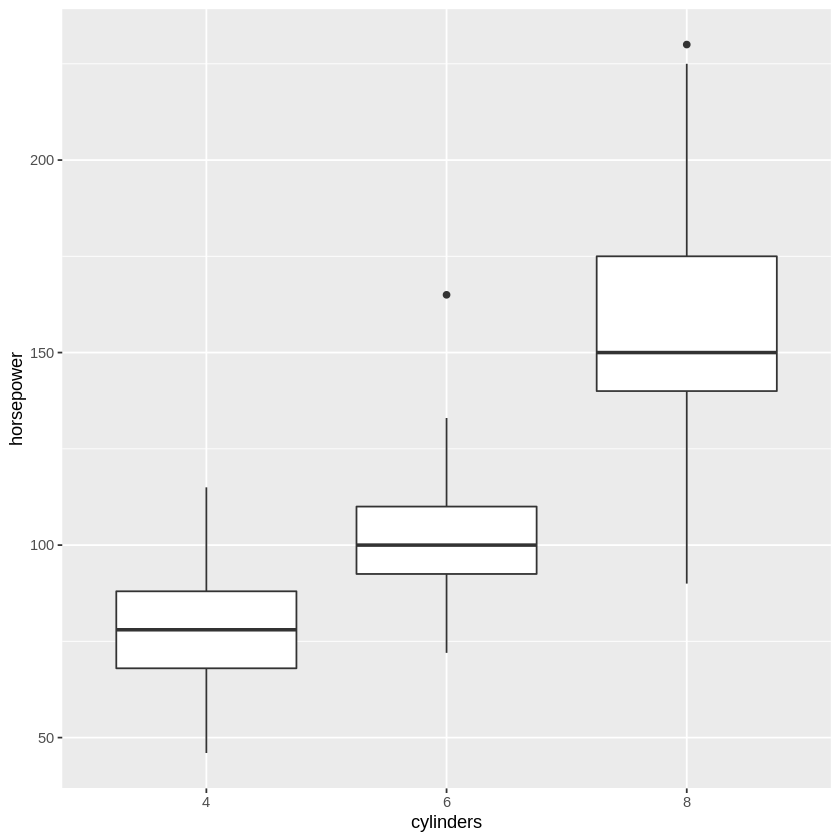

In [11]:
cars_summ_hp <- cars %>% group_by(cylinders) %>%
  summarize(sample_size = n(),
    mean = mean(horsepower),
    sd = sd(horsepower),
    minimum = min(horsepower),
    lower_quartile = quantile(horsepower, 0.25),
    median = median(horsepower),
    upper_quartile = quantile(horsepower, 0.75),
    max = max(horsepower))
cars_summ_hp

cars_plot_2 <- cars %>%
    ggplot(aes(x= cylinders, y = horsepower)) +
    geom_boxplot()
cars_plot_2

## Acceleration

cylinders,sample_size,mean,sd,minimum,lower_quartile,median,upper_quartile,max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,199,16.58191,2.383185,11.6,14.80,16.2,18.0,24.8
6,83,16.25422,2.031778,11.3,15.05,16.0,17.6,21.0
8,103,12.95534,2.224759,8.0,11.50,13.0,14.0,22.2


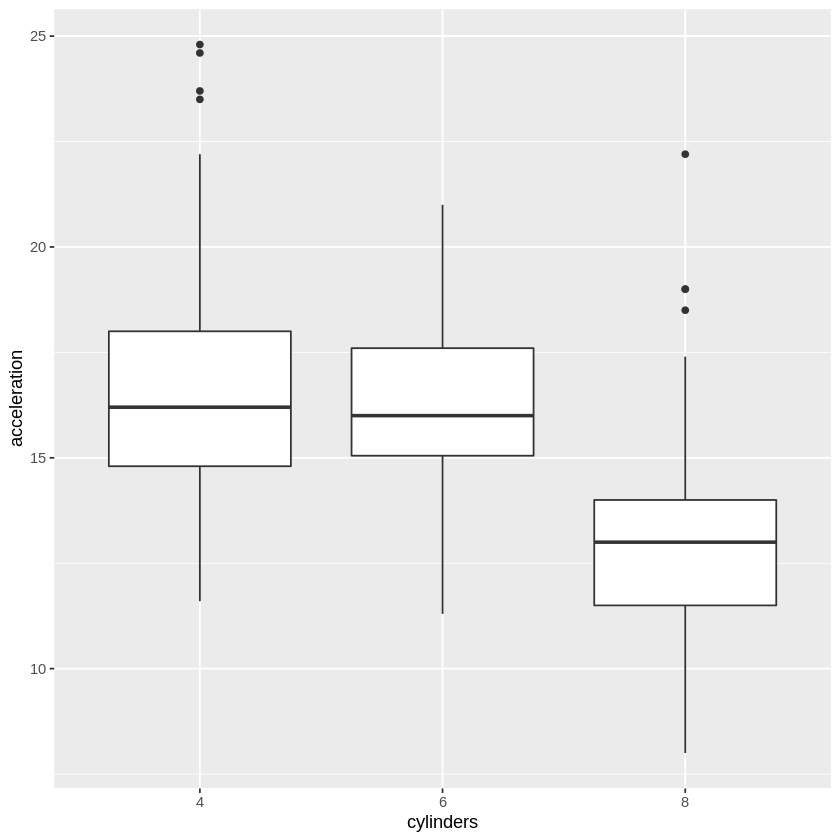

In [12]:
cars_summ_acc <- cars %>% group_by(cylinders) %>%
  summarize(sample_size = n(),
    mean = mean(acceleration),
    sd = sd(acceleration),
    minimum = min(acceleration),
    lower_quartile = quantile(acceleration, 0.25),
    median = median(acceleration),
    upper_quartile = quantile(acceleration, 0.75),
    max = max(acceleration))
cars_summ_acc

cars_plot_3 <- cars %>%
    ggplot(aes(x= cylinders, y = acceleration)) +
    geom_boxplot()
cars_plot_3